In [1]:
import streamlit as st
import pandas as pd
from PIL import Image
import pylab as plt
import webbrowser
import base64
import io
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium
import plost

In [2]:
cars = pd.read_csv('Clean_Electric_Vehicle_Population_Data.csv')
price = pd.read_csv('Cars_Price_Clean.csv')
stations = pd.read_csv('Clean_Charging_stations.csv')

In [ ]:
import streamlit as st
import pandas as pd
from PIL import Image
import pylab as plt
import webbrowser
import base64
import io
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium

st.title('Electrifying Connecticut') 

cars = pd.read_csv('Clean_Electric_Vehicle_Population_Data.csv')
price = pd.read_csv('Cars_Price_Clean.csv')
stations = pd.read_csv('Clean_Charging_stations.csv')





m = folium.Map(location= [ 41.730405,-72.790618 ], tiles = 'OpenStreetMap', zoom_start = 10)
for i,row in stations.iterrows():
    latitude = stations.at[i, 'latitude']
    longitude = stations.at[i, 'longitude']
    name = stations.at[i, 'station_name']
    
    folium.Marker(location= [longitude, latitude],popup= name,icon= folium.Icon(color= 'blue')).add_to(m)
st_data = st_folium(m, width=725)






CAFVs, Types, Electric_Ranges, Years, Makes = st.columns(5)
with Makes:
    Make= st.selectbox('Filter by Make' , cars.make.unique())
with CAFVs:
    CAFV = st.selectbox('Filter by CAFV', cars.cafv_eligibilaty.unique())
with Types:
    Type = st.selectbox('Filter by Type', cars.electric_vehicle_type.unique())
with Years:
    year_min, year_max = st.select_slider('Filter by Years', 
                                        options=[i for i in range(0,cars.model_year.max()+1)],
                                        value=[0, cars.model_year.max()])
with Electric_Ranges:
    electric_range_min, electric_range_max = st.select_slider('Filter by Electric Range', 
                                        options=[i for i in range(0,cars.electric_range.max()+1)],
                                        value=[0, cars.electric_range.max()])
df1 = cars[['model_year','make', 'model', 'electric_vehicle_type', 'cafv_eligibilaty','electric_range']].sort_values(by='model_year')   
var = df1[(df1.cafv_eligibilaty == CAFV) &
              (df1.model_year >= year_min) &
              (df1.model_year <= year_max) &
              (df1.electric_vehicle_type == Type)&
              (df1.electric_range >= electric_range_min) &
              (df1.electric_range <= electric_range_max) &
              (df1.make == Make)].drop_duplicates().reset_index(drop=True)


st.dataframe(var)
df_plot = df1[(df1.cafv_eligibilaty == CAFV) &
              (df1.model_year >= year_min) &
              (df1.model_year <= year_max) &
              (df1.electric_vehicle_type == Type) &
              (df1.electric_range >= electric_range_min) &
              (df1.electric_range <= electric_range_max) &
              (df1.make == Make)]

color_map = {
    'Electric': 'blue',
    'Hybrid': 'green',
    'Plug-in Hybrid': 'orange'
}
colors = [color_map.get(type, 'gray') for type in df_plot['electric_vehicle_type']]
fig, ax = plt.subplots()
plt.title(f'Puntos Totales del por Jugador - Posición')
ax.barh(y=df_plot.unique(), width=df_plot['electric_range'], color= colors)
st.caption('## También podemos mostrar gráficos')
st.pyplot(fig)

In [8]:
%pip install streamlit_folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.1/450.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import streamlit as st
import pandas as pd
from PIL import Image
import pylab as plt
import webbrowser
import base64
import io
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import st_folium

In [4]:
cars = pd.read_csv('Clean_Electric_Vehicle_Population_Data.csv')
price = pd.read_csv('Cars_Price_Clean.csv')
stations = pd.read_csv('Clean_Charging_stations.csv')

In [29]:
price

,Make,model,price
0,Average,NaN,61354
1,BYD,DOLPHIN,26000
2,MG,MG4,26995
3,Fiat,500e,28195
4,BYD,DOLPHIN,28500
...,...,...,...
205,Porsche,Taycan,149300
206,Mercedes,EQS,161860
207,BMW,i7,163315
208,Maserati,GranTurismo,200000


In [28]:
cars[['model_year','make', 'model', 'electric_vehicle_type', 'cafv_eligibilaty','electric_range']] 

,model_year,make,model,electric_vehicle_type,cafv_eligibilaty,electric_range
0,2011,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,73
1,2017,CHEVROLET,BOLT EV,Electric,Clean Alternative Fuel Vehicle Eligible,238
2,2019,FORD,FUSION,Plug-in Hybrid,Not eligible due to low battery range,26
3,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215
4,2013,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,75
...,...,...,...,...,...,...
36277,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215
36278,2019,SMART,EQ FORTWO,Electric,Clean Alternative Fuel Vehicle Eligible,58
36279,2018,MERCEDES-BENZ,C-CLASS,Plug-in Hybrid,Not eligible due to low battery range,8
36280,2020,AUDI,Q5 E,Plug-in Hybrid,Not eligible due to low battery range,20


In [ ]:
m = folium.Map(location= [ 41.730405,-72.790618 ], tiles = 'OpenStreetMap', zoom_start = 10)
for i,row in df1.iterrows():
    latitude = df1.at[i, 'latitude']
    longitude = df1.at[i, 'longitude']
    name = df1.at[i, 'station_name']
    
    folium.Marker(location= [longitude, latitude],popup= name,icon= folium.Icon(color= 'blue')).add_to(m)
st_data = st_folium(m, width=725)

In [25]:
print(cars.model.unique())
price.model.unique()

['LEAF' 'BOLT EV' 'FUSION' 'MODEL 3' 'SOUL' 'Q5 E' 'MODEL X' 'VOLT' 'X5'
 '530E' 'TAYCAN' 'X3' 'A3' 'SOUL EV' 'C-MAX' '500' 'MODEL S' 'F-150' 'CT6'
 'I3' 'MODEL Y' 'NIRO' 'OUTLANDER' 'PACIFICA' 'R1T' 'CLARITY'
 'KONA ELECTRIC' 'XC40' 'ID.4' 'PRIUS PLUG-IN' 'MUSTANG MACH-E'
 'EQB-CLASS' 'RAV4 PRIME' 'E-GOLF' 'PRIUS PRIME' 'C40' 'SORENTO' 'XC60'
 'CAYENNE' 'WRANGLER' 'COUNTRYMAN' 'S60' 'EV6' 'FORTWO ELECTRIC DRIVE'
 'GRAND CHEROKEE' '330E' 'CROSSTREK' 'IONIQ 5' 'IONIQ' 'E-TRON' 'ROADSTER'
 'KONA' 'XC90' 'SPARK' 'PS2' 'A7' 'HARDTOP' 'ESCAPE' 'LUCID AIR'
 'E-TRON SPORTBACK' 'Q5' 'RAV4' 'AVIATOR' 'E-TRON GT' 'EDV' 'IX' 'FORTWO'
 'I-PACE' 'SANTA FE' 'B-CLASS' 'KARMA' 'I4' 'OPTIMA' 'GLC-CLASS' 'Q4'
 'SONATA' 'EQ FORTWO' 'FOCUS' 'RANGE ROVER SPORT' 'TRANSIT' 'PANAMERA'
 'I8' 'BOLT EUV' 'CORSAIR' 'ELR' 'GLE-CLASS' 'V60' 'EQS-CLASS SEDAN' 'R1S'
 'I-MIEV' 'NX' '740E' 'SPORTAGE' 'C-CLASS' 'S-CLASS' 'CITY' 'S90' 'TUCSON'
 'GV60' 'EQS-CLASS SUV' 'A8 E' 'RANGE ROVER' 'RS E-TRON GT' 'RANGER'
 'BENTAYG

array([nan, 'DOLPHIN', 'MG4', '500e', 'Leaf', 'Zoe', 'ZS', 'MG5', '600e',
       'MX-30', 'e-208', 'e-C4', 'Funky', 'e-Berlingo', 'Corsa',
       'Electric', 'Soul', 'e-Rifter', 'EX30', 'Corsa-e', 'Combo-e',
       'Kona', 'Avenger', '#1', 'Ocean', 'e-2008', 'Born', 'ATTO',
       'Vivaro-e', 'Megane', 'e-308', 'e-SpaceTourer', 'ID.3', '3',
       'Niro', 'e', 'Mokka-e', 'ID.4', 'Enyaq', 'Astra', 'e-Traveller',
       'Model', 'IONIQ', '2', 'EV6', 'bZ4X', 'Ariya', 'XC40', 'UX', 'C40',
       'Solterra', 'i4', 'Tavascan', 'Q4', 'ID.5', 'Mustang', 'EQA',
       'ID.7', 'iX1', 'GV60', '4', 'EQB', 'ID.', 'EV9', 'iX3', 'RZ',
       'GV70', 'MIFA', 'Q8', 'G80', 'iX', 'I-Pace', 'i5', 'EQE', 'eVito',
       'Taycan', 'e-tron', 'EQV', 'Eletre', 'EX90', 'SQ8', 'i7', 'EQS',
       'Grecale', 'GranTurismo', 'Spectre'], dtype=object)

In [15]:
CAFV, Price, Make, Model, Electric_Range = st.columns(5)
with CAFVs:
    CAFV = st.selectbox('Filtrar Equipos', cars.cafv_eligibilaty.unique())
with goles:
gol_min, gol_max = st.select_slider('Filtrar por Goles', # slider => filtro barra deslizante
                                    options=[i for i in range(0,df.Goals.max()+1)],
                                    value=[0, df.Goals.max()])

IndentationError: expected an indented block after 'with' statement on line 4 (3788292991.py, line 5)

In [11]:
cep = cars.groupby('electric_vehicle_type').count()
cep

,Unnamed: 0,county,city,state,postal_code,model_year,make,model,cafv_eligibilaty,electric_range,vehicle_location,electric_utility,latitude,longitude
electric_vehicle_type,,,,,,,,,,,,,,
Electric,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723
Plug-in Hybrid,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559


In [7]:
cars

,Unnamed: 0,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibilaty,electric_range,vehicle_location,electric_utility,latitude,longitude
0,0,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,73,(-120.50721 46.60448),PACIFICORP,-120.50721,46.60448
1,1,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Electric,Clean Alternative Fuel Vehicle Eligible,238,(-121.7515 48.53892),PUGET SOUND ENERGY INC,-121.75150,48.53892
2,2,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid,Not eligible due to low battery range,26,(-122.20596 47.97659),PUGET SOUND ENERGY INC,-122.20596,47.97659
3,3,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.18384 47.8031),PUGET SOUND ENERGY INC,-122.18384,47.80310
4,4,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,75,(-122.23019 47.94949),PUGET SOUND ENERGY INC,-122.23019,47.94949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36277,36277,Kitsap,Gig Harbor,WA,98329,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.72457 47.38165),PUGET SOUND ENERGY INC,-122.72457,47.38165
36278,36278,King,Seattle,WA,98133,2019,SMART,EQ FORTWO,Electric,Clean Alternative Fuel Vehicle Eligible,58,(-122.3503 47.71868),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.35030,47.71868
36279,36279,Kitsap,Bainbridge Island,WA,98110,2018,MERCEDES-BENZ,C-CLASS,Plug-in Hybrid,Not eligible due to low battery range,8,(-122.521 47.62728),PUGET SOUND ENERGY INC,-122.52100,47.62728
36280,36280,King,Seattle,WA,98177,2020,AUDI,Q5 E,Plug-in Hybrid,Not eligible due to low battery range,20,(-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.36498,47.72238


In [18]:
%pip install pygwalker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 12.4 MB/s eta 0:00:0000:010:01m


Note: you may need to restart the kernel to use updated packages.


In [17]:
cars["electric_vehicle_type"].value_counts().values

array([21723, 14559])

In [1]:
import pygwalker as pyg

In [8]:
pyg.walk(cars)

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [12]:
len(cars[cars['electric_vehicle_type']=='Plug-in Hybrid'])
len(cars[cars['electric_vehicle_type']=='Electric'])

21723

In [23]:
cars.groupby("electric_vehicle_type").count()

,Unnamed: 0,county,city,state,postal_code,model_year,make,model,cafv_eligibilaty,electric_range,vehicle_location,electric_utility,latitude,longitude
electric_vehicle_type,,,,,,,,,,,,,,
Electric,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723,21723
Plug-in Hybrid,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559,14559


In [62]:
lop = len(cars[(cars['model_year']<= 2012) & (cars['electric_vehicle_type']== 'Electric') ])

In [63]:
lep = len(cars[(cars['model_year']<= 2022) & (cars['model_year'] >= 2010) & (cars['electric_vehicle_type']== 'Electric') ])
lep/lop * 100

2884.895104895105

In [64]:
lip = len(cars[(cars['model_year']<= 2012) & (cars['electric_vehicle_type']== 'Plug-in Hybrid') ])

In [65]:
lup = len(cars[(cars['model_year']<= 2022) & (cars['model_year'] >= 2010) & (cars['electric_vehicle_type']== 'Plug-in Hybrid') ])

In [67]:
lup/lip * 100

2738.3018867924525

In [20]:
st.markdown('### Bar Plot')
plost.bar_chart(data=cars  ,bar='electric_vehicle_type',value= 'electric_vehicle_type')

In [33]:
cars['electric_vehicle_type'].value_counts()

Electric          21723
Plug-in Hybrid    14559
Name: electric_vehicle_type, dtype: int64

In [68]:
price

,Make,model,price
0,Average,NaN,61354
1,BYD,DOLPHIN,26000
2,MG,MG4,26995
3,Fiat,500e,28195
4,BYD,DOLPHIN,28500
...,...,...,...
205,Porsche,Taycan,149300
206,Mercedes,EQS,161860
207,BMW,i7,163315
208,Maserati,GranTurismo,200000


In [8]:
lep = cars.groupby('model')['city'].count()

In [10]:
lop = pd.DataFrame({'labels':lep.index,'size': lep.values})
lop

,labels,size
0,330E,228
1,500,548
2,530E,262
3,740E,28
4,745E,7
...,...,...
109,X3,153
110,X5,665
111,XC40,247
112,XC60,488


In [20]:
import plotly.express as px
fig = px.treemap(lop, path=['labels'], values='size')

# Customizations
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),  # Adjust the margins
    title="Car Models Distribution",     # Add a title
    font=dict(size=16),                  # Adjust the font size
    uniformtext=dict(minsize=12, mode='hide'),  # Hide small labels
    treemapcolorway=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # Custom color palette
)

fig.update_traces(
    # Customize the hover labels
    hovertemplate='<b>%{label}</b><br>Size: %{value}',
)

fig.show()

In [12]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [25]:
cars[cars['model']== 'LEAF']['cafv_eligibilaty'][0]

'Clean Alternative Fuel Vehicle Eligible'

,Unnamed: 0,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibilaty,electric_range,vehicle_location,electric_utility,latitude,longitude
16,16,Thurston,Olympia,WA,98502,2021,NISSAN,LEAF,Electric,Eligibility unknown as battery range has not b...,0,(-122.92333 47.03779),PUGET SOUND ENERGY INC,-122.92333,47.03779
34,34,Snohomish,Everett,WA,98204,2022,FORD,F-150,Electric,Eligibility unknown as battery range has not b...,0,(-122.25527 47.90456),PUGET SOUND ENERGY INC,-122.25527,47.90456
50,50,Snohomish,Snohomish,WA,98290,2022,NISSAN,LEAF,Electric,Eligibility unknown as battery range has not b...,0,(-122.09305 47.91265),PUGET SOUND ENERGY INC,-122.09305,47.91265
51,51,King,Redmond,WA,98052,2022,CHEVROLET,BOLT EV,Electric,Eligibility unknown as battery range has not b...,0,(-122.13158 47.67858),PUGET SOUND ENERGY INC,-122.13158,47.67858
53,53,King,Issaquah,WA,98029,2022,TESLA,MODEL Y,Electric,Eligibility unknown as battery range has not b...,0,(-122.00292 47.54748),PUGET SOUND ENERGY INC,-122.00292,47.54748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,36251,Spokane,Spokane,WA,99207,2021,CHEVROLET,BOLT EV,Electric,Eligibility unknown as battery range has not b...,0,(-117.3973 47.67573),BONNEVILLE POWER ADMINISTRATION,-117.39730,47.67573
36259,36259,Spokane,Spokane,WA,99212,2021,TESLA,MODEL 3,Electric,Eligibility unknown as battery range has not b...,0,(-117.3186 47.6505),BONNEVILLE POWER ADMINISTRATION,-117.31860,47.65050
36262,36262,Whatcom,Ferndale,WA,98248,2022,VOLKSWAGEN,ID.4,Electric,Eligibility unknown as battery range has not b...,0,(-122.59351 48.84756),PUGET SOUND ENERGY INC,-122.59351,48.84756
36265,36265,Skagit,Mount Vernon,WA,98274,2022,TESLA,MODEL S,Electric,Eligibility unknown as battery range has not b...,0,(-122.32267 48.41626),PUGET SOUND ENERGY INC,-122.32267,48.41626


In [78]:
lep = cars[cars['cafv_eligibilaty'] != 'Eligibility unknown as battery range has not been researched']
lep.groupby('cafv_eligibilaty')['make'].count()
lep.loc[lep['cafv_eligibilaty'] == 'Clean Alternative Fuel Vehicle Eligible', 'bool'] = 1
    


,Unnamed: 0,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibilaty,electric_range,vehicle_location,electric_utility,latitude,longitude,bool
0,0,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,73,(-120.50721 46.60448),PACIFICORP,-120.50721,46.60448,1
1,1,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Electric,Clean Alternative Fuel Vehicle Eligible,238,(-121.7515 48.53892),PUGET SOUND ENERGY INC,-121.75150,48.53892,1
2,2,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid,Not eligible due to low battery range,26,(-122.20596 47.97659),PUGET SOUND ENERGY INC,-122.20596,47.97659,0
3,3,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.18384 47.8031),PUGET SOUND ENERGY INC,-122.18384,47.80310,1
4,4,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Electric,Clean Alternative Fuel Vehicle Eligible,75,(-122.23019 47.94949),PUGET SOUND ENERGY INC,-122.23019,47.94949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36277,36277,Kitsap,Gig Harbor,WA,98329,2018,TESLA,MODEL 3,Electric,Clean Alternative Fuel Vehicle Eligible,215,(-122.72457 47.38165),PUGET SOUND ENERGY INC,-122.72457,47.38165,1
36278,36278,King,Seattle,WA,98133,2019,SMART,EQ FORTWO,Electric,Clean Alternative Fuel Vehicle Eligible,58,(-122.3503 47.71868),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.35030,47.71868,1
36279,36279,Kitsap,Bainbridge Island,WA,98110,2018,MERCEDES-BENZ,C-CLASS,Plug-in Hybrid,Not eligible due to low battery range,8,(-122.521 47.62728),PUGET SOUND ENERGY INC,-122.52100,47.62728,0
36280,36280,King,Seattle,WA,98177,2020,AUDI,Q5 E,Plug-in Hybrid,Not eligible due to low battery range,20,(-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.36498,47.72238,0


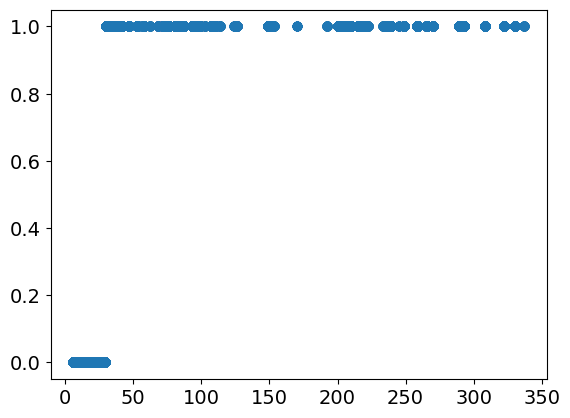

In [80]:
plt.scatter(data= lep, x='electric_range', y = 'bool')

In [ ]:
coln1,coln2= st.columns((3,7))
    with coln1:
       
        copium= st.selectbox('Select model', cars.model.unique())
    with coln2:
        st.metric(label= 'CAFV', value= cars[cars['model']== copium]['cafv_eligibilaty'].mode())
        
    coln3,coln4,coln5 = st.columns(3)    
    with coln3:
        
        st.metric(label= 'Electric Range', value=f" {cars[cars['model']== copium]['electric_range'][0]} miles ")
    with coln4:
        
        st.metric(label= 'Make', value= cars[cars['model']== copium]['make'][0])
    with coln5:
        st.metric(label= 'Type', value= cars[cars['model']== copium]['electric_vehicle_type'][0])